
cc fraud data .  these are columns name distance_from_home	distance_from_last_transaction	ratio_to_median_purchase_price	repeat_retailer	used_chip	used_pin_number	online_order	fraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier


# Read Dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Copy of Copy of card_transdata.csv")

In [3]:
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0


In [4]:
df.tail(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999998,4.258729,0.242023,0.475822,1,0,0,1,0
999999,58.108125,0.318110,0.386920,1,1,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


there are all num col in two part .first is float64 and second one is int64

In [34]:
df.shape

(1000000, 8)

In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Oversampling Techniques
Simple repetetion of the minority class
SMOTE: Synthetic Minority Oversampling Technique
Repetetion, but after adding noise (not discussed here)
Repetetion, but after applying transforms (not discussed here)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [10]:
df.nunique()

distance_from_home                999971
distance_from_last_transaction    999836
ratio_to_median_purchase_price    999808
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
dtype: int64

In [11]:
df.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

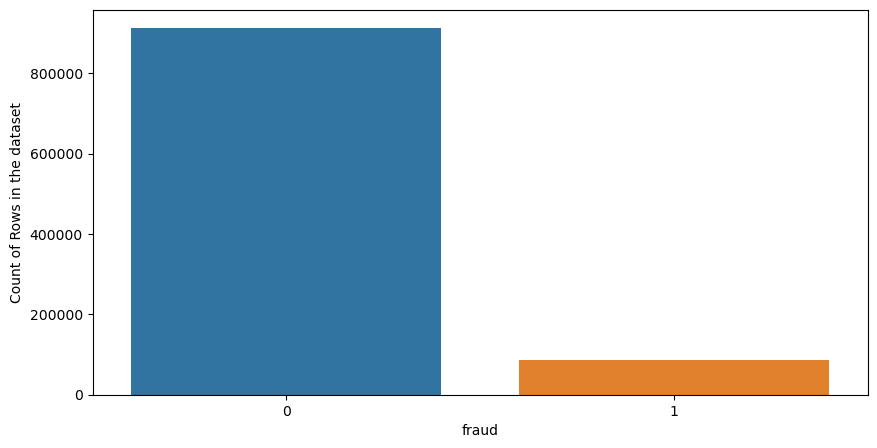

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x ='fraud', data = df)
plt.xlabel('fraud')
plt.ylabel('Count of Rows in the dataset')
plt.show()

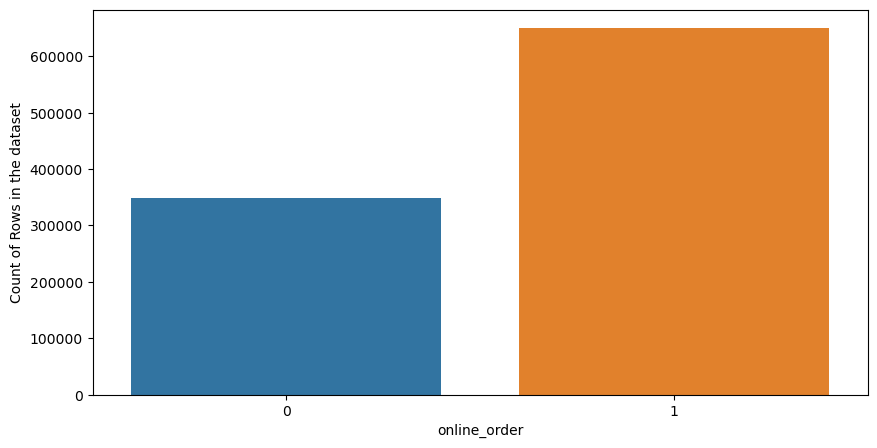

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x ='online_order', data = df)
plt.xlabel('online_order')
plt.ylabel('Count of Rows in the dataset')
plt.show()

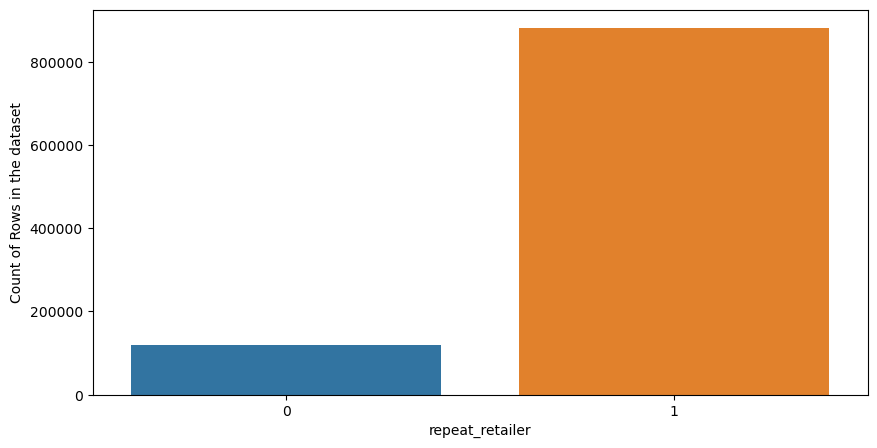

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x ='repeat_retailer', data = df)
plt.xlabel('repeat_retailer')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In [36]:
import pandas_profiling as pp
pp.ProfileReport(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_7868\2725490056.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\HP\AppData\Local\Temp\ipykernel_7868\4096472109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
C:\Users\HP\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\HP\AppData\Local\Temp\ipykernel_7868\4096472109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ada

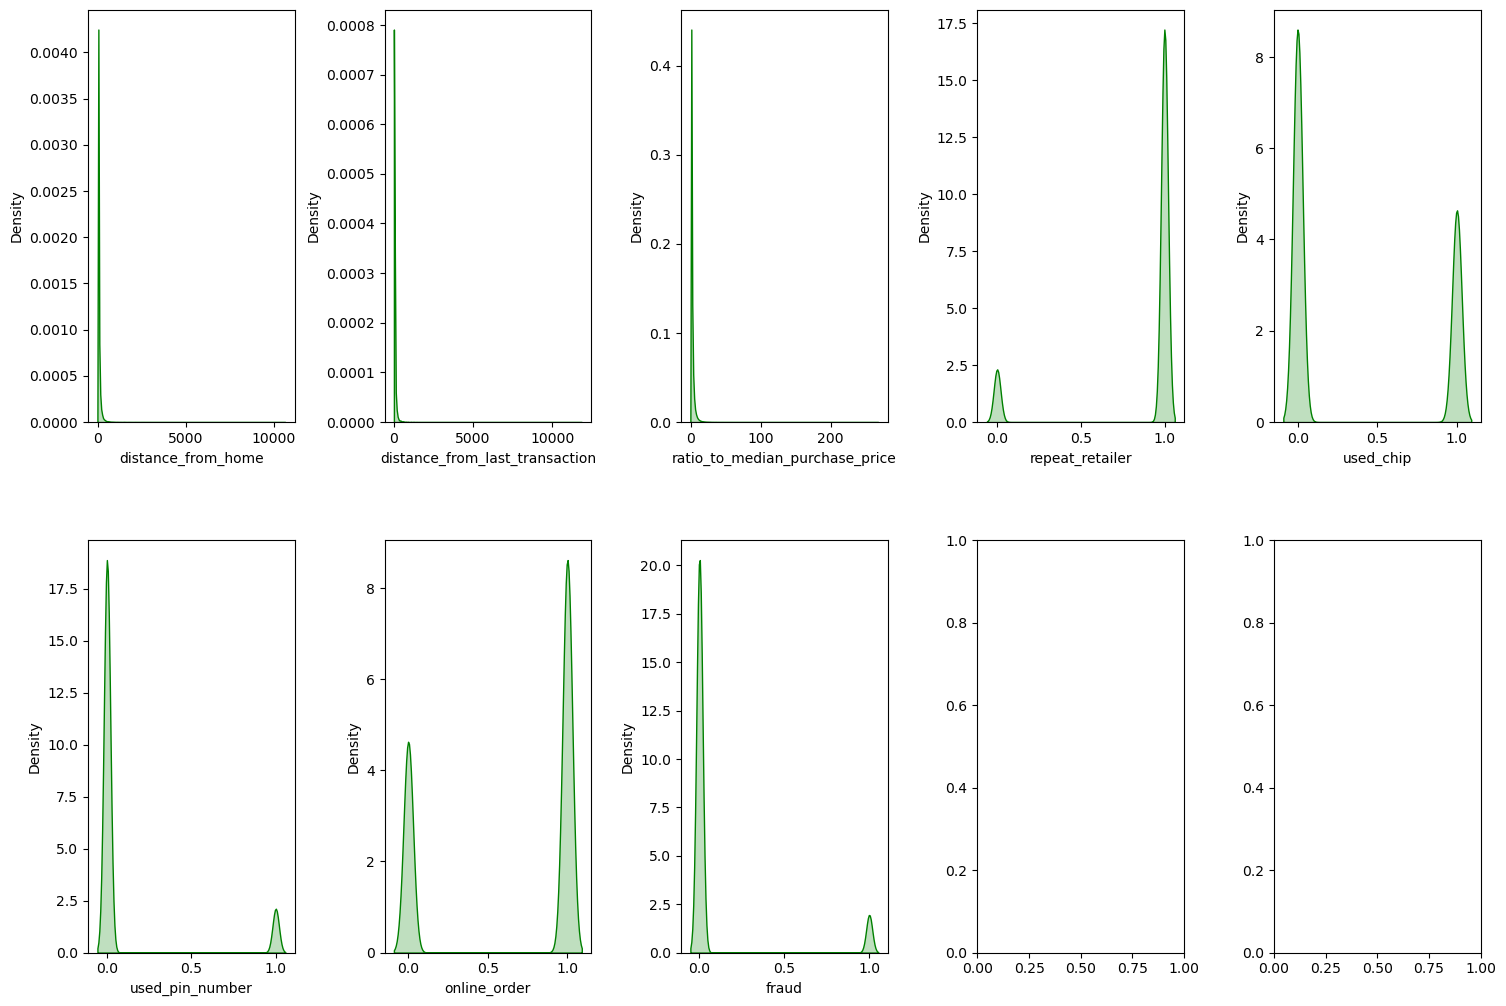

In [13]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

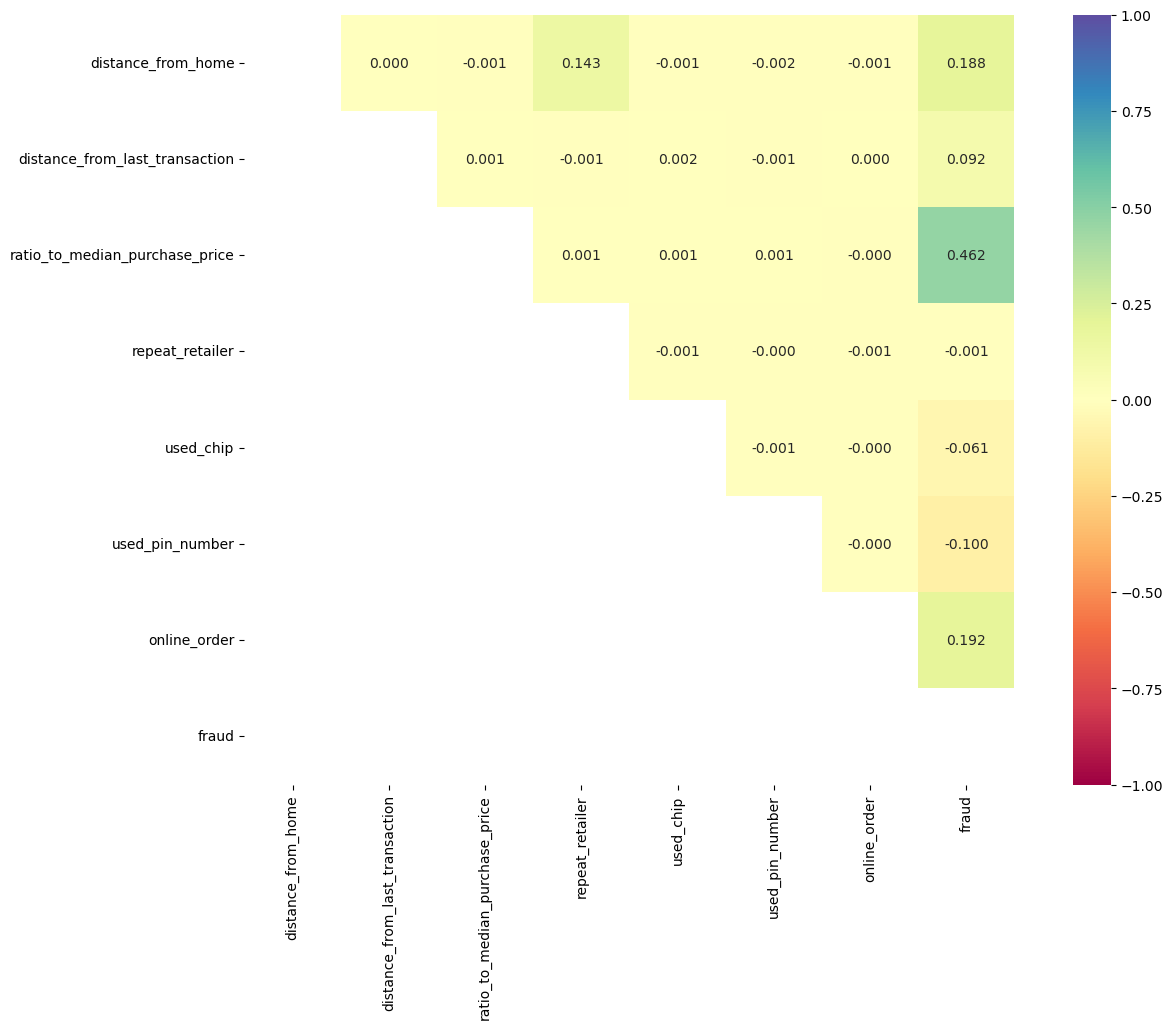

In [14]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
#Input Split

X = df.drop(columns=['fraud'], axis=1)
Y = df['fraud']


In [16]:
df.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,1.94594,1,1,0,0,0


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=27)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_test.shape)

(800000, 7)
(200000, 7)
(800000,)
(200000, 7)


In [18]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train_scaled,Y_train)
pred = model_dtc.predict(X_test)


C:\Users\HP\anaconda3\New folder\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [24]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20    182482
           1       0.10      1.00      0.18     17518

    accuracy                           0.19    200000
   macro avg       0.55      0.56      0.19    200000
weighted avg       0.92      0.19      0.20    200000



In [25]:
print(accuracy_score(Y_test,pred))

0.189455


In [26]:
print(roc_curve(Y_test,pred))

(array([0.        , 0.88824103, 1.        ]), array([0.        , 0.99880123, 1.        ]), array([2, 1, 0], dtype=int64))


In [27]:
print(confusion_matrix(Y_test,pred))

[[ 20394 162088]
 [    21  17497]]


In [28]:

RFC=  RandomForestClassifier
model_RFC = dtc.fit(X_train_scaled,Y_train)
pred_RFC = model_dtc.predict(X_test)

C:\Users\HP\anaconda3\New folder\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [32]:
print(confusion_matrix(Y_test,pred_RFC))
print(classification_report(Y_test,pred_RFC))

[[ 20394 162088]
 [    21  17497]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20    182482
           1       0.10      1.00      0.18     17518

    accuracy                           0.19    200000
   macro avg       0.55      0.56      0.19    200000
weighted avg       0.92      0.19      0.20    200000



In [30]:
print(roc_curve(Y_test,pred_RFC))

(array([0.        , 0.88824103, 1.        ]), array([0.        , 0.99880123, 1.        ]), array([2, 1, 0], dtype=int64))


In [33]:
print(accuracy_score(Y_test,pred_RFC))

0.189455
